Qual a relação entre a condição do domicílio com a segurança Alimentar? Para responder esta pergunta decidi ser um pouco mais específico em minha análise, foram considerados apenas moradores da regiâo urbana de São Paulo e destes foram separados em três faixas salariais.

In [13]:
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
dados =pd.read_csv('DOM2009csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [5]:
#Primeira seleção de variáveis
dadosPR = dados.loc[:,[
    "UF","V0207","V4623","V4105","V4622"]]
#Segunda seleção, delimitando as categorias mais significantes
dadosPR = dadosPR[(dadosPR.V0207 == 1)|(dadosPR.V0207 == 2)|(dadosPR.V0207 == 3)|(dadosPR.V0207 == 5)]
dadosPR.V0207= dadosPR.V0207.astype('category')
dadosPR.V0207.cat.categories = ("Proprio_ja_pago","Proprio_ainda_pagando","Alugado","Cedido_de_outra_forma")
#Eliminando dados Invalidos
dadosPR = dadosPR[pd.notnull(dados.V0207)]



# Segunda Seleção de variéveis, pois pretendo analizar apenas a regiâo urbana 
dadosPR = dadosPR[(dadosPR.V4105 == 1)]
# Dado o nome de apenas uma variável, pois as outras não servirão para a analize e conclusão da pergunta, além de não possuirem um número relevante de pessoas
dadosPR.V4105= dadosPR.V4105.astype('category')
dadosPR.V4105.cat.categories = ("URBANA_Cidade_ou_vila_area_urbanizada")


#Escolido três faixas salariais para analize
dadosPR = dadosPR[(dadosPR.V4622 == 1)|(dadosPR.V4622 == 2)|(dadosPR.V4622 == 3)]
dadosPR.V4622= dadosPR.V4622.astype('category')
dadosPR.V4622.cat.categories = ("Mais_de_1/4_ate_1/2_salario_minimo","Mais_de_1/2_ate_1_salario_minimo","Mais_de_ 1_ate_2_salarios_minimos")

#Decidido analizar apenas as moradias com indivíduos menores de idade
dadosPR = dadosPR[(dadosPR.V4623 == 1)|(dadosPR.V4623 == 2)|(dadosPR.V4623 == 3)|(dadosPR.V4623 == 4)]
dadosPR.V4623= dadosPR.V4623.astype('category')
dadosPR.V4623.cat.categories = ("Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar","Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve","Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada","Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave")


#Selecionando apenas São Paulo, que é o estado de interesse desta análize
dadosPR = dadosPR[dadosPR.UF==35]
dadosPR.UF = dadosPR.UF.astype('category')
dadosPR.UF.cat.categories = ("Sao_Paulo")

# Renomeando as Colunas
dadosPR.columns = ["Estado","Condicao_de_ocupacao_do_domicilio","Seguranca_Alimentar","Codigo_de_Situacao_Censitaria","Faixa_do_rendimento_mensal_domiciliar_per_capita"]



C:\Users\vitor\Documents\Anaconda-Phython\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [239]:
dadosPR.Seguranca_Alimentar.value_counts()

Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar           1814
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve         853
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada     193
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave        141
Name: Seguranca_Alimentar, dtype: int64

In [7]:
#Criando diferentes dados com diferentes variáveis pra futura representação gráfica e alcance de objetivo


#Separando as variáveis da faixa de rendimento
dadosPR4 = dadosPR[dadosPR.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_1/4_ate_1/2_salario_minimo"]
dadosPR5 = dadosPR[dadosPR.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_1/2_ate_1_salario_minimo"]
dadosPR6 = dadosPR[dadosPR.Faixa_do_rendimento_mensal_domiciliar_per_capita=="Mais_de_ 1_ate_2_salarios_minimos"]

#Separando as variáveis DA CONDIÇÃO DE OCUPAÇÃO DO DOMICILIO 
dadosPR1 = dadosPR[dadosPR.Condicao_de_ocupacao_do_domicilio=="Proprio_ja_pago"]
dadosPR2 = dadosPR[dadosPR.Condicao_de_ocupacao_do_domicilio=="Proprio_ainda_pagando"]
dadosPR3 = dadosPR[dadosPR.Condicao_de_ocupacao_do_domicilio=="Alugado"]

#Crosstab para Gráficos finais, cruzando segurança alimentar com o tipo de condição de moradia (com os dados das respectivas variáveis)
c = pd.crosstab(dadosPR4.Seguranca_Alimentar, dadosPR4.Condicao_de_ocupacao_do_domicilio, normalize='columns')*100
ct = pd.crosstab(dadosPR5.Seguranca_Alimentar, dadosPR5.Condicao_de_ocupacao_do_domicilio, normalize='columns')*100
ctt = pd.crosstab(dadosPR6.Seguranca_Alimentar, dadosPR6.Condicao_de_ocupacao_do_domicilio, normalize='columns')*100

#Como Codigo_de_Situacao_Censitaria só possue apenas uma variável não é preciso separa la mais
ct3 = pd.crosstab(dadosPR.Codigo_de_Situacao_Censitaria,dadosPR.Faixa_do_rendimento_mensal_domiciliar_per_capita , normalize=False)



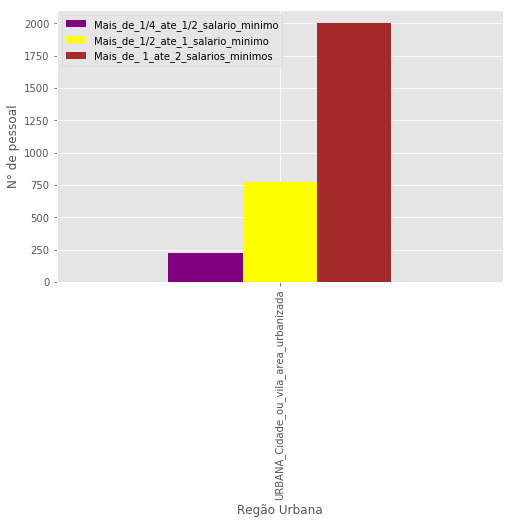

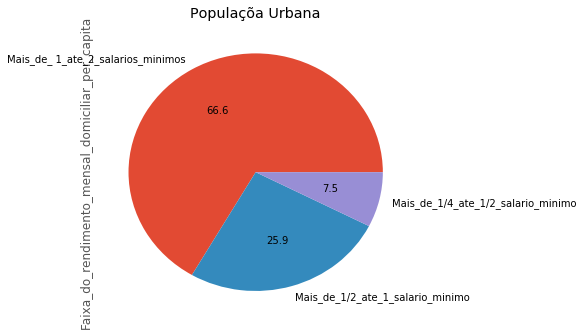

In [21]:
#Plotando gráfico de barras com numero absoluto de indivíduos por faixa salarial
ct3.plot(kind='bar', color=( 'purple', 'yellow','brown'),  figsize=(8,5))
plt.ylabel('N° de pessoal')
plt.legend(loc='upper left', prop={'size':10})
plt.xlabel('Regão Urbana')
plt.show()

#Plotando gráfico em forma de pizza para visualizar a frequência relativa de cada faixa salarial 
GR2 = dadosPR.Faixa_do_rendimento_mensal_domiciliar_per_capita[dadosPR.Codigo_de_Situacao_Censitaria=="URBANA_Cidade_ou_vila_area_urbanizada"].value_counts()
plt.title('Populaçõa Urbana')

GR2.plot(kind='pie', autopct="%.1f",legend=False, figsize=(5,5))
plt.tight_layout()
plt.show()

A partir do primeiro gráfico acima, podemos apenas dizer que faixa salarial onde as pessoas concentran-se. A partir do gráfico de pizza, temos uma ideia da frequência relativa da quantidade de pessoas por faixa salarial.

In [24]:
# tabela de dados cruzados para faixa salarial entre 1/4 - 1/2 salario mínimo
c

Condicao_de_ocupacao_do_domicilio,Proprio_ja_pago,Proprio_ainda_pagando,Alugado,Cedido_de_outra_forma
Seguranca_Alimentar,,,,
Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,34.234234,27.777778,30.188679,25.581395
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,39.639640,27.777778,41.509434,39.534884
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,9.909910,16.666667,9.433962,11.627907
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave,16.216216,27.777778,18.867925,23.255814


In [25]:
# tabela de dados cruzados para faixa salarial entre 1/2 - 1 salario mínimo
ct

Condicao_de_ocupacao_do_domicilio,Proprio_ja_pago,Proprio_ainda_pagando,Alugado,Cedido_de_outra_forma
Seguranca_Alimentar,,,,
Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,51.122195,55.555556,51.111111,46.875000
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,34.912718,29.629630,31.111111,36.458333
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,8.977556,11.111111,8.888889,7.291667
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave,4.987531,3.703704,8.888889,9.375000


In [26]:
# tabela de dados cruzados para faixa salarial entre 1 - 2 salarios mínimos
ctt

Condicao_de_ocupacao_do_domicilio,Proprio_ja_pago,Proprio_ainda_pagando,Alugado,Cedido_de_outra_forma
Seguranca_Alimentar,,,,
Tem_morador_menor_de_18_anos_e_tem_seguranca_alimentar,70.181818,73.809524,62.841530,59.016393
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_leve,24.818182,17.857143,26.775956,29.508197
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_moderada,3.090909,7.142857,6.921676,8.743169
Tem_morador_menor_de_18_anos_e_inseguranca_alimentar_grave,1.909091,1.190476,3.460838,2.732240


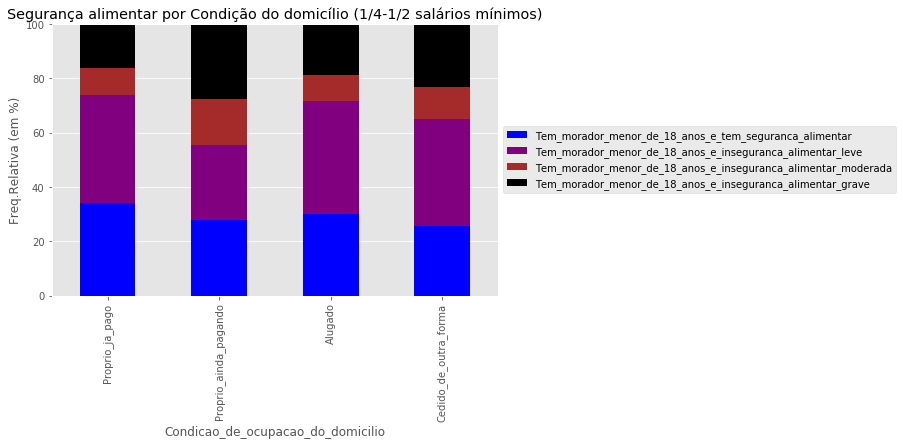

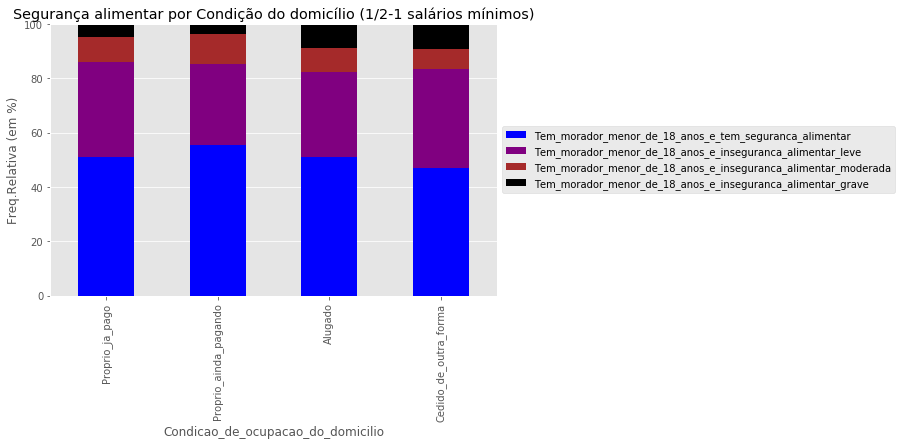

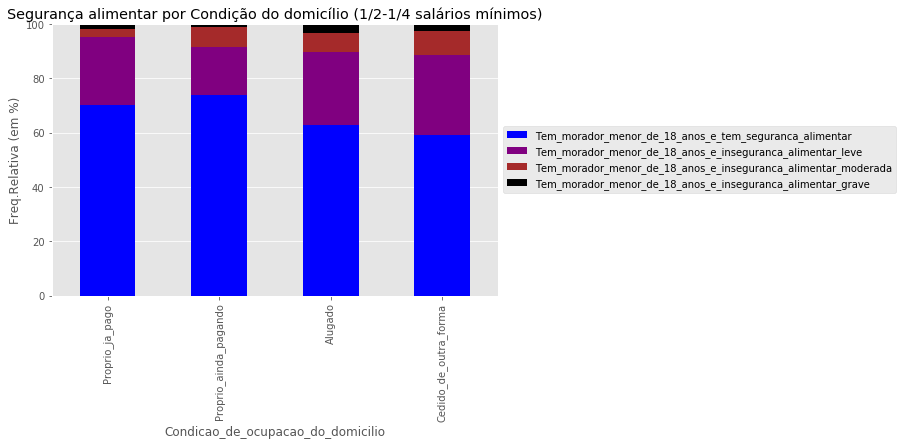

In [19]:
#Grafico cruzando individuos com faixa salarial entre 1/4 e 1/2 salarios minimos e com segurança alimentar
plot = c.T.plot(kind='bar', stacked=True,title='Segurança alimentar por Condição do domicílio (1/4-1/2 salários mínimos)', figsize=(10,5), color=('blue','purple','brown','black'))
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#Grafico cruzando individuos com faixa salarial entre 1/2 e 1 salarios minimos e com segurança alimentar
plot = ct.T.plot(kind='bar', stacked=True,title='Segurança alimentar por Condição do domicílio (1/2-1 salários mínimos)', figsize=(10,5), color=('blue','purple','brown','black'))
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


#Graffico cruzando individuos com faixa salarial entre 1 e 2 salarios minimos e com segurança alimentar
plot = ctt.T.plot(kind='bar', stacked=True,title='Segurança alimentar por Condição do domicílio (1/2-1/4 salários mínimos)', figsize=(10,5), color=('blue','purple','brown','black'))
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em %)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))




   Com os gráficos acima, divididos respectivamente da menor faixa salarial para a maior, é possivel observar o comportamento de cada variável pertencente ao tipo de condição da moradia com a segurança alimentar, para cada faixa salarial.
   Em linhas gerais o comportamento observado foi o esperado, pois há um aumento da frequência relativa para segurança alimentar em todos as variáveis no eixo X  perante o aumento salarial.Por fim o comportamento oposto é visto para os diferentes tipos de insegurança alimentar, que diminuem ao passo que a faxa salarial aumenta. 
   Analisando separadamente os gráficos, observamos um comportamento diferente da variável "Proprio_Ainda_Pagando", pórem semelhante nos três gráficos, devido a grande diferença do padrão adiquirido das frequências relativas da outras. No primeiro observamos um aumento siginificante da insegurança alimentar grave, uma diminuição da segurança alimentar e da insegurança moderada, comportamento não visto nas demais, as quais apresentam até uma relativa similaridade. No segundo e terceiro gráfico fica mais evidente a maior e menor frequênca relativa da segurança alimentar e da insegurança grave respectivamente, apontando uma maior similaridade com a variável "Proprio_ja_ago" nestes ultimos dois gráficos.
   
